In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

# Load the dataset
df = pd.read_csv("../results/outputs/outliers_removed_telco_data.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

In [2]:
# Select numerical columns
num_cols = ['tenure','MonthlyCharges','TotalCharges']
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [3]:
# Standard scaling
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df[num_cols])

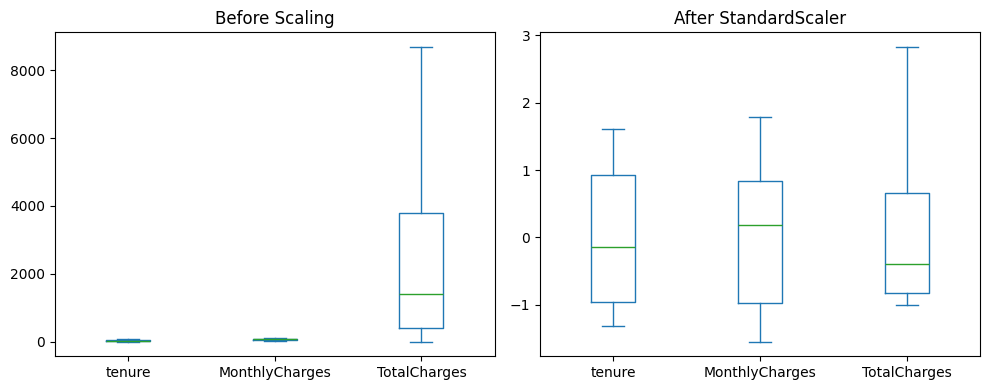

In [4]:
# Visualization before and after scaling
plt.figure(figsize=(10,4))

# Before scaling
plt.subplot(1,2,1)
df[num_cols].plot(kind='box', title='Before Scaling', ax=plt.gca())

# After StandardScaler
plt.subplot(1,2,2)
df_std[num_cols].plot(kind='box', title='After StandardScaler', ax=plt.gca())

plt.tight_layout()
plt.show()

In [5]:
df.to_csv('../results/outputs/scaled_telco_data.csv', index=False)